<center>
    <font size=6><b>Programming3 Project</b></font>
    <br><br></center>    
    <br>
    <div style="text-align: right"> 산업데이터사이언스학부 Team05</div>
    <div style="text-align: right"> 201804200 나승채</div>
    <div style="text-align: right"> 201804234 이현도</div>
    <div style="text-align: right"> 201804255 함도윤</div>
    
---

## <center> <font size=5><b>프로젝트 목표</b></font></center>
### <center> 노트북 데이터를 활용하여 사용자가 원하는 조건의 노트북들을 비교 분석하기 </center>


노트북과 같이 다양한 스펙 데이터가 있는 제품을 구매하고자 고를때, 내가 원하는 스펙의 조건중 가장 합리적인 제품이 무엇인지 한눈에 비교하게 해주는 시스템입니다.

현재 네이버나 다나와 쇼핑몰에서는 cpu와 제조사, 화면 크기, 메모리, 저장 용량, 무게까지는 원하는 스펙을 선택하여 그에 맞는 제품을 확인할 수 있도록 되어있지만,

GPU나 배터리, HDMI 포트 유무, 두께, 웹캠 유무등 섬세한 스펙은 선택하여 볼 수 없습니다.

이런 부족한 부분을 보완하여 소비자가 자신에게 적합한 노트북을 선택할 수 있도록 도와주는 시스템을 구축하는 것이 목표입니다.

## <center> <font size=5><b>데이터 선정</b></font></center>
### <center>다나와 쇼핑몰 검색어 '노트북' 창에서 인기 상품 항목을 크롤링한 데이터</center>



<div>
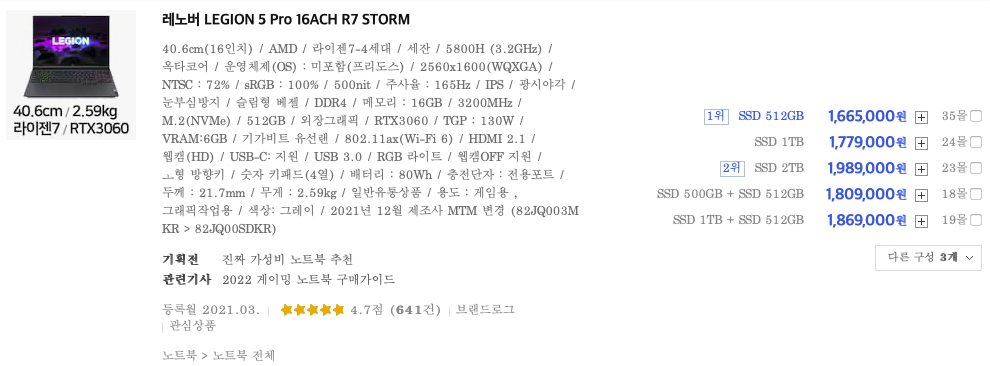 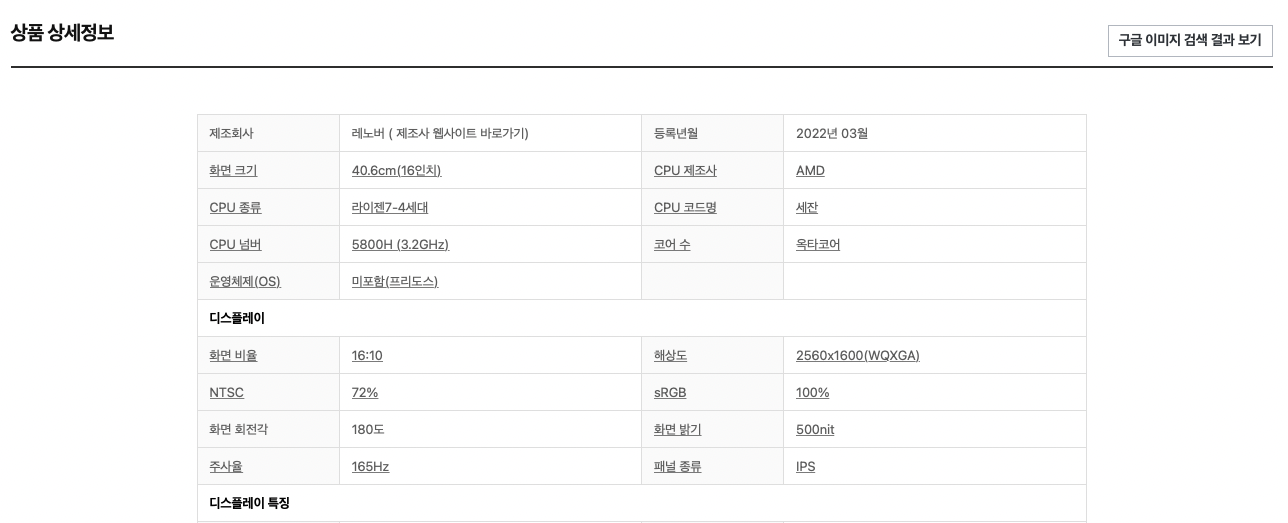
    
</div>

## <center>1. 데이터 수집</center>

In [1]:
cd

/Users/jeeyul


In [19]:
import pandas as pd
import numpy as np
import time
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver import ChromeOptions

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait

from bs4 import BeautifulSoup

options = ChromeOptions()
options.add_argument('headless')

# url = "http://search.danawa.com/dsearch.php?k1=%EB%85%B8%ED%8A%B8%EB%B6%81"
# driver = Chrome(executable_path='Downloads/chromedriver')
# driver.get(url)

# MSI : maker=2904, 


In [ ]:
url_item = "http://prod.danawa.com/info/?pcode=16825496&keyword=%EB%85%B8%ED%8A%B8%EB%B6%81&cate=112758"
driver_item = Chrome(executable_path='Downloads/chromedriver')
driver_item.get(url_item)
soup_item = BeautifulSoup(driver_item.page_source)

tem_inpo_title = soup_item.select('div.detail_cont div.prod_spec table th.tit')

In [ ]:
item_list = []
want_title = ["화면 크기","CPU 종류","운영체제(OS)",'화면 비율','광시야각','메모리 타입','메모리','저장 용량','저장장치 종류','GPU 칩셋','HDMI','웹캠(HD)','배터리','어댑터','두께','무게','USB','ㅗ형 방향키','ㅡ형 방향키']

for page in range(1,10):

    print('\n',page)
    url = "http://search.danawa.com/dsearch.php?query=%EB%85%B8%ED%8A%B8%EB%B6%81&originalQuery=%EB%85%B8%ED%8A%B8%EB%B6%81&previousKeyword=%EB%85%B8%ED%8A%B8%EB%B6%81&volumeType=allvs&page="+str(page)+"&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=112758&defaultPhysicsCategoryCode=860%7C869%7C10586%7C0&defaultVmTab=85012&defaultVaTab=7076658&tab=goods"
    driver = Chrome(executable_path='Downloads/chromedriver')
    driver.get(url)
    
    soup = BeautifulSoup(driver.page_source)
    product_li_tags = soup.select('p.prod_name a.click_log_product_standard_title_')
    num = 0
    for tg in product_li_tags:
        item_one_list = []
        
        name = tg.get_text()
        item_one_list.append(name)
        
        link = tg.attrs['href']
        url_item = link
        driver_item = Chrome(executable_path='Downloads/chromedriver')
        driver_item.get(url_item)
        soup_item = BeautifulSoup(driver_item.page_source)

        item_inpo_title = soup_item.select('div.detail_cont div.prod_spec table th.tit')
        item_inpo_value = soup_item.select('div.detail_cont div.prod_spec table td.dsc')

        product_price   = soup_item.select('div.row span.lwst_prc em.prc_c')
        item_one_list.append(product_price[0].get_text())
        
        del item_inpo_title[0]
        del item_inpo_value[0]

        item_inpo_title_list = []
        item_inpo_value_list = []
        for tit,val in zip(item_inpo_title,item_inpo_value):
            title = tit.get_text()
            value = val.get_text()
            item_inpo_title_list.append(title)
            item_inpo_value_list.append(value)
            

        for i in want_title:
            if i in item_inpo_title_list:
                item_one_list.append(item_inpo_value_list[item_inpo_title_list.index(i)])
            else:
                item_one_list.append(np.nan)

        item_list.append(tuple(item_one_list))
        print(num,end=' ')
        num += 1
        


In [ ]:
df_item = pd.DataFrame(item_list, columns = ['제품명','가격',"화면 크기","CPU 종류","운영체제(OS)",'화면 비율','광시야각','메모리 타입','메모리','저장 용량','저장장치 종류','GPU 칩셋','HDMI','웹캠(HD)','배터리','어댑터','두께','무게','USB','ㅗ형 방향키','ㅡ형 방향키'])

df_item

In [20]:
df_item.to_csv("Desktop/YUL/3-2/프로그래밍3/notebooks_final.csv", mode='w')

In [21]:
df_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제품명       360 non-null    object
 1   가격        360 non-null    object
 2   화면 크기     360 non-null    object
 3   CPU 종류    360 non-null    object
 4   운영체제(OS)  360 non-null    object
 5   화면 비율     354 non-null    object
 6   광시야각      281 non-null    object
 7   메모리 타입    350 non-null    object
 8   메모리       360 non-null    object
 9   저장 용량     360 non-null    object
 10  저장장치 종류   360 non-null    object
 11  GPU 칩셋    353 non-null    object
 12  HDMI      225 non-null    object
 13  웹캠(HD)    266 non-null    object
 14  배터리       351 non-null    object
 15  어댑터       306 non-null    object
 16  두께        360 non-null    object
 17  무게        360 non-null    object
 18  USB       358 non-null    object
 19  ㅗ형 방향키    304 non-null    object
 20  ㅡ형 방향키    56 non-null     object
dtypes: object(21)
me

In [22]:
df_item = pd.read_csv("Desktop/YUL/3-2/프로그래밍3/notebooks_final.csv")
# df_item = pd.read_csv("Desktop/YUL/3-2/프로그래밍3/notebooks_final.csv",index_col = '제품명')

In [23]:
df_item

,Unnamed: 0,제품명,가격,화면 크기,CPU 종류,운영체제(OS),화면 비율,광시야각,메모리 타입,메모리,...,GPU 칩셋,HDMI,웹캠(HD),배터리,어댑터,두께,무게,USB,ㅗ형 방향키,ㅡ형 방향키
0,0,레노버 아이디어패드 Slim3-15ITL 5D WIN10 16GB램,"637,190",39.62cm(15.6인치),코어i5-11세대,윈도우10,16:9,○,DDR4,16GB,...,Iris Xe,○,○,NaN,NaN,19.9mm,1.65kg,총3개,NaN,○
1,1,삼성전자 갤럭시북 NT750XDZ-AM58S,"711,000",39.6cm(15.6인치),코어i5-11세대,미포함(프리도스),16:9,○,LPDDR4x(온보드),8GB,...,Iris Xe,○,○,54Wh,65W,15.4mm,1.55kg,총4개,○,NaN
2,2,LG전자 2022 그램16(12세대) 16ZD90Q-EX76K,"2,249,000",40.6cm(16인치),코어i7-12세대,미포함(프리도스),16:10,○,LPDDR5(온보드),16GB,...,RTX2050,○,NaN,90Wh,65W,16.8mm,1.285kg,총4개,○,NaN
3,3,레노버 요가 Slim7 Carbon 14ACN6 82L0004YKR,"1,568,000",35.56cm(14인치),라이젠7-4세대,미포함(프리도스),16:10,NaN,LPDDR4x(온보드),16GB,...,MX450,NaN,○,61Wh,NaN,14.9mm,1.09kg,총3개,NaN,○
4,4,레노버 V15 G2 82KD000UKR 8GB램,"444,990",39.62cm(15.6인치),라이젠5-4세대,미포함(프리도스),16:9,NaN,DDR4,8GB,...,Radeon Graphics,○,NaN,38Wh,NaN,19.9mm,1.7kg,총3개,NaN,○
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,355,MSI GP시리즈 Vector GP76 12UGS,"2,499,000",43.9cm(17.3인치),코어i7-12세대,미포함(프리도스),16:9,○,DDR4,16GB,...,RTX3070 Ti,○,○,65Wh,280W,25.9mm,2.9kg,총4개,○,NaN
356,356,주연테크 슈퍼플라이 J9FT,"755,100",35.56cm(14인치),코어i5-11세대,미포함(프리도스),16:9,○,DDR4,16GB,...,Iris Xe,○,○,73Wh,65W,16.5mm,1.12kg,총3개,○,NaN
357,357,GIGABYTE AERO 16 XE5 OLED,"3,379,000",40.8cm(16인치),코어i7-12세대,미포함(프리도스),16:10,NaN,DDR5,16GB,...,RTX3070 Ti,NaN,NaN,99Wh,230W,22.4mm,2.3kg,총3개,○,NaN
358,358,한성컴퓨터 TFG5275,"1,399,000",39.62cm(15.6인치),코어i7-12세대,미포함(프리도스),16:9,○,DDR4,16GB,...,RTX3050,NaN,○,53.35Wh,150W,26mm,2kg,총4개,○,NaN


## <center>2. 데이터 전처리</center>
데이터 전처리의 이유는 사용자가 요구하는 조건을 통해 데이터를 뽑아 낼 경우 에러가 발생할 확률이 매우 높기때문   

에 진행해주었습니다. 수집한 데이터를 봤을때 단위, 결측치, 열이름, 특수문자여부 등 일관성이 없는 것을 볼 수   

있습니다. 또한 여기서 데이터 타입이 수치형인데 명목형으로 나온 경우도 있기때문에 전부 수정해주었습니다.

In [24]:
df_item = df_item.drop(columns=['Unnamed: 0'])

In [25]:
df_item

,제품명,가격,화면 크기,CPU 종류,운영체제(OS),화면 비율,광시야각,메모리 타입,메모리,저장 용량,...,GPU 칩셋,HDMI,웹캠(HD),배터리,어댑터,두께,무게,USB,ㅗ형 방향키,ㅡ형 방향키
0,레노버 아이디어패드 Slim3-15ITL 5D WIN10 16GB램,"637,190",39.62cm(15.6인치),코어i5-11세대,윈도우10,16:9,○,DDR4,16GB,256GB,...,Iris Xe,○,○,NaN,NaN,19.9mm,1.65kg,총3개,NaN,○
1,삼성전자 갤럭시북 NT750XDZ-AM58S,"711,000",39.6cm(15.6인치),코어i5-11세대,미포함(프리도스),16:9,○,LPDDR4x(온보드),8GB,256GB,...,Iris Xe,○,○,54Wh,65W,15.4mm,1.55kg,총4개,○,NaN
2,LG전자 2022 그램16(12세대) 16ZD90Q-EX76K,"2,249,000",40.6cm(16인치),코어i7-12세대,미포함(프리도스),16:10,○,LPDDR5(온보드),16GB,256GB,...,RTX2050,○,NaN,90Wh,65W,16.8mm,1.285kg,총4개,○,NaN
3,레노버 요가 Slim7 Carbon 14ACN6 82L0004YKR,"1,568,000",35.56cm(14인치),라이젠7-4세대,미포함(프리도스),16:10,NaN,LPDDR4x(온보드),16GB,1TB,...,MX450,NaN,○,61Wh,NaN,14.9mm,1.09kg,총3개,NaN,○
4,레노버 V15 G2 82KD000UKR 8GB램,"444,990",39.62cm(15.6인치),라이젠5-4세대,미포함(프리도스),16:9,NaN,DDR4,8GB,256GB,...,Radeon Graphics,○,NaN,38Wh,NaN,19.9mm,1.7kg,총3개,NaN,○
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,MSI GP시리즈 Vector GP76 12UGS,"2,499,000",43.9cm(17.3인치),코어i7-12세대,미포함(프리도스),16:9,○,DDR4,16GB,1TB,...,RTX3070 Ti,○,○,65Wh,280W,25.9mm,2.9kg,총4개,○,NaN
356,주연테크 슈퍼플라이 J9FT,"755,100",35.56cm(14인치),코어i5-11세대,미포함(프리도스),16:9,○,DDR4,16GB,512GB,...,Iris Xe,○,○,73Wh,65W,16.5mm,1.12kg,총3개,○,NaN
357,GIGABYTE AERO 16 XE5 OLED,"3,379,000",40.8cm(16인치),코어i7-12세대,미포함(프리도스),16:10,NaN,DDR5,16GB,1TB,...,RTX3070 Ti,NaN,NaN,99Wh,230W,22.4mm,2.3kg,총3개,○,NaN
358,한성컴퓨터 TFG5275,"1,399,000",39.62cm(15.6인치),코어i7-12세대,미포함(프리도스),16:9,○,DDR4,16GB,500GB,...,RTX3050,NaN,○,53.35Wh,150W,26mm,2kg,총4개,○,NaN


In [26]:
df_item.head()

,제품명,가격,화면 크기,CPU 종류,운영체제(OS),화면 비율,광시야각,메모리 타입,메모리,저장 용량,...,GPU 칩셋,HDMI,웹캠(HD),배터리,어댑터,두께,무게,USB,ㅗ형 방향키,ㅡ형 방향키
0,레노버 아이디어패드 Slim3-15ITL 5D WIN10 16GB램,"637,190",39.62cm(15.6인치),코어i5-11세대,윈도우10,16:9,○,DDR4,16GB,256GB,...,Iris Xe,○,○,NaN,NaN,19.9mm,1.65kg,총3개,NaN,○
1,삼성전자 갤럭시북 NT750XDZ-AM58S,"711,000",39.6cm(15.6인치),코어i5-11세대,미포함(프리도스),16:9,○,LPDDR4x(온보드),8GB,256GB,...,Iris Xe,○,○,54Wh,65W,15.4mm,1.55kg,총4개,○,NaN
2,LG전자 2022 그램16(12세대) 16ZD90Q-EX76K,"2,249,000",40.6cm(16인치),코어i7-12세대,미포함(프리도스),16:10,○,LPDDR5(온보드),16GB,256GB,...,RTX2050,○,NaN,90Wh,65W,16.8mm,1.285kg,총4개,○,NaN
3,레노버 요가 Slim7 Carbon 14ACN6 82L0004YKR,"1,568,000",35.56cm(14인치),라이젠7-4세대,미포함(프리도스),16:10,NaN,LPDDR4x(온보드),16GB,1TB,...,MX450,NaN,○,61Wh,NaN,14.9mm,1.09kg,총3개,NaN,○
4,레노버 V15 G2 82KD000UKR 8GB램,"444,990",39.62cm(15.6인치),라이젠5-4세대,미포함(프리도스),16:9,NaN,DDR4,8GB,256GB,...,Radeon Graphics,○,NaN,38Wh,NaN,19.9mm,1.7kg,총3개,NaN,○


In [27]:
def preprocessing_data(df):
    
    # ㅗ형 방향키 & ㅡ형 방향키 수정
    make_wk_list = []
    for wk1,wk2 in zip(df['ㅗ형 방향키'].fillna('0'),df['ㅡ형 방향키'].fillna('0')):
        if (wk1 == '0') & (wk2 != '0'):
            make_wk_list.append('0')
        elif (wk1 != '0') & (wk2 == '0'):
            make_wk_list.append('1')
        else:
            make_wk_list.append(np.nan)
    make_wk = pd.DataFrame(make_wk_list,columns = ['방향키(ㅡ형/ㅗ형)'],dtype = 'category')
    
    #USB 열 수정
    def pre_usb(val):
        if val == '0':
            return val
        else:
            return val[1:-1]
    make_usb = df['USB'].fillna('0').apply(pre_usb).rename('USB(개)').astype(np.int8)
    
    #무게 열 수정
    def pre_kg(mm):
        if mm[-2:] == 'kg':
            return mm[:-2]
        else:
            return str(float(mm[:-1])*0.001)
    make_kg = df['무게'].fillna('0').apply(pre_kg).rename('무게(kg)').astype(np.float64).round(2)
    
    #어댑터 열 수정
    def pre_ad(ad):
        if ad =='0':
            return np.nan
        else:
            return ad[:-1]
    make_ad = df['어댑터'].fillna('0').apply(pre_ad).rename('어댑터(W)').astype(np.float64).round(2)
    
    #HDMI 열 수정
    make_hdmi = df['HDMI'].fillna('0').replace('○','1').astype('category')
    
    #저장 용량 열 수정
    def pre_sm(sm):
        msm = sm[:-2]
        if msm == '1':
            return msm+'024'
        elif msm == '2':
            return msm+'048'
        elif msm == '4':
            return msm+'096'
        else:
            return msm
    make_sm = df['저장 용량'].apply(pre_sm).rename('저장 용량(GB)').astype(np.int16)
    
    #메모리 열 수정
    def pre_mem(mem):
        return mem[:-2]
    make_mem = df['메모리'].apply(pre_mem).rename('메모리(GB)').astype(np.int16)
    
    #두께 열 수정
    make_mm = df['두께'].apply(pre_mem).rename('두께(mm)').astype(np.float64).round(2)
    
    #가격 열 수정
    def pre_pri(pr):
        return pr.replace(',','')
    make_pr = df['가격'].apply(pre_pri).astype(np.int32)
    
    #화면크기 열 수정
    def pre_ds(ds):
        return float(ds.split('(')[-1][:-3])
    make_ds = df['화면 크기'].apply(pre_ds).astype(np.float64).round(2)
    
    #웹캠 열 수정
    make_wc = df['웹캠(HD)'].fillna('0').replace('○','1').astype('category')
    
    #광시야각 수정
    make_la = df['광시야각'].fillna('0').replace('○','1').astype('category')
    
    #제조사 열 생성
    def pre_md(md):
        return md.split(' ')[0]
    make_md = df['제품명'].apply(pre_md).rename('제조사')
    
    #배터리 수정
    def pre_bt(bt):
        if bt == '0':
            return '-1'
        else:
            return bt[:-2]
    make_bt = df['배터리'].fillna('0').apply(pre_bt).rename('배터리(Wh)').astype(np.float64).round(2)
    
    return pd.concat(
        [make_md,make_pr,make_usb,make_kg,make_ad,make_hdmi,make_sm,
         make_mem,make_mm,make_ds,make_wc,make_la,make_bt,make_wk,
        df['CPU 종류'],df['운영체제(OS)'],df['화면 비율'],df['메모리 타입'],df['저장장치 종류'],df['GPU 칩셋']],axis=1)

In [28]:
notebooks = preprocessing_data(df_item)

In [29]:
notebooks.index = df_item['제품명']
notebooks

,제조사,가격,USB(개),무게(kg),어댑터(W),HDMI,저장 용량(GB),메모리(GB),두께(mm),화면 크기,웹캠(HD),광시야각,배터리(Wh),방향키(ㅡ형/ㅗ형),CPU 종류,운영체제(OS),화면 비율,메모리 타입,저장장치 종류,GPU 칩셋
제품명,,,,,,,,,,,,,,,,,,,,
레노버 아이디어패드 Slim3-15ITL 5D WIN10 16GB램,레노버,637190,3,1.65,NaN,1,256,16,19.9,15.6,1,1,-1.00,0,코어i5-11세대,윈도우10,16:9,DDR4,M.2(NVMe),Iris Xe
삼성전자 갤럭시북 NT750XDZ-AM58S,삼성전자,711000,4,1.55,65.0,1,256,8,15.4,15.6,1,1,54.00,1,코어i5-11세대,미포함(프리도스),16:9,LPDDR4x(온보드),M.2(NVMe),Iris Xe
LG전자 2022 그램16(12세대) 16ZD90Q-EX76K,LG전자,2249000,4,1.28,65.0,1,256,16,16.8,16.0,0,1,90.00,1,코어i7-12세대,미포함(프리도스),16:10,LPDDR5(온보드),M.2(NVMe),RTX2050
레노버 요가 Slim7 Carbon 14ACN6 82L0004YKR,레노버,1568000,3,1.09,NaN,0,1024,16,14.9,14.0,1,0,61.00,0,라이젠7-4세대,미포함(프리도스),16:10,LPDDR4x(온보드),M.2(NVMe),MX450
레노버 V15 G2 82KD000UKR 8GB램,레노버,444990,3,1.70,NaN,1,256,8,19.9,15.6,0,0,38.00,0,라이젠5-4세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),Radeon Graphics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSI GP시리즈 Vector GP76 12UGS,MSI,2499000,4,2.90,280.0,1,1024,16,25.9,17.3,1,1,65.00,1,코어i7-12세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3070 Ti
주연테크 슈퍼플라이 J9FT,주연테크,755100,3,1.12,65.0,1,512,16,16.5,14.0,1,1,73.00,1,코어i5-11세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),Iris Xe
GIGABYTE AERO 16 XE5 OLED,GIGABYTE,3379000,3,2.30,230.0,0,1024,16,22.4,16.0,0,0,99.00,1,코어i7-12세대,미포함(프리도스),16:10,DDR5,M.2(NVMe),RTX3070 Ti


## <center>3. 데이터 집계</center>  
데이터 전처리 이후 데이터가 어떤 특징이 있는지 살펴보았습니다. 주로 명목형변수는 value_counts()함수를  

사용하였고 수치형 데이터는 기술통계량과 집계함수를 사용해보았습니다.

In [30]:
notebooks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 레노버 아이디어패드 Slim3-15ITL 5D WIN10 16GB램 to 한성컴퓨터 TFX3150U Pro
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   제조사         360 non-null    object  
 1   가격          360 non-null    int32   
 2   USB(개)      360 non-null    int8    
 3   무게(kg)      360 non-null    float64 
 4   어댑터(W)      306 non-null    float64 
 5   HDMI        360 non-null    category
 6   저장 용량(GB)   360 non-null    int16   
 7   메모리(GB)     360 non-null    int16   
 8   두께(mm)      360 non-null    float64 
 9   화면 크기       360 non-null    float64 
 10  웹캠(HD)      360 non-null    category
 11  광시야각        360 non-null    category
 12  배터리(Wh)     360 non-null    float64 
 13  방향키(ㅡ형/ㅗ형)  360 non-null    category
 14  CPU 종류      360 non-null    object  
 15  운영체제(OS)    360 non-null    object  
 16  화면 비율       354 non-null    object  
 17  메모리 타입      350 non-null    object  
 18  저장장치

In [33]:
min(notebooks['배터리(Wh)'])

-1.0

In [34]:
list(notebooks['저장 용량(GB)'].value_counts().index)

[512, 256, 1024, 500, 2048, 128, 250, 4096]

In [35]:
notebooks['무게(kg)'].sort_values()

제품명
삼성전자 갤럭시북2 프로 NT930XEW-A51A          0.87
삼성전자 갤럭시북 프로 NT930XDY-A51A           0.87
삼성전자 갤럭시북S NT767XCL-KC58S            0.95
삼성전자 갤럭시북S NT767XCM-K38              0.95
삼성전자 갤럭시북S NT767XCL-KLTE             0.95
                                     ... 
ASUS ROG SCAR G733ZM-LL035 WIN10     2.90
ASUS ROG STRIX G17 G713RS-LL012      2.90
MSI GP시리즈 GP76 Leopard 11UH WIN10    2.90
ASUS ROG STRIX G17 G713RM-LL121      2.90
DELL 에일리언웨어 x17 R2 WP04KR            2.96
Name: 무게(kg), Length: 360, dtype: float64

In [36]:
notebooks.describe()

,가격,USB(개),무게(kg),어댑터(W),저장 용량(GB),메모리(GB),두께(mm),화면 크기,배터리(Wh)
count,3.600000e+02,360.000000,360.000000,306.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,1.619071e+06,3.611111,1.834417,129.803922,521.322222,17.188889,19.879778,15.564167,62.634333
std,9.945394e+05,0.792646,0.575578,80.714113,372.025168,10.754691,4.395635,1.185953,20.256045
min,2.789900e+05,0.000000,0.870000,24.000000,128.000000,4.000000,11.200000,13.000000,-1.000000
25%,9.393500e+05,3.000000,1.300000,65.000000,256.000000,8.000000,16.800000,15.600000,50.000000
50%,1.444245e+06,4.000000,1.775000,90.000000,512.000000,16.000000,19.050000,15.600000,62.000000
75%,1.889000e+06,4.000000,2.300000,200.000000,512.000000,16.000000,24.200000,16.000000,80.000000
max,6.990000e+06,6.000000,2.960000,330.000000,4096.000000,64.000000,32.400000,17.300000,100.000000


In [37]:
notebooks['가격'].sum()/len(notebooks['가격'])

1619070.6666666667

In [38]:
#제품사 별 평균 가격 분포

def price_mean(s):
    return int(s.가격.sum()/len(s.가격))
def price_sqrt(s):
    return np.sqrt(s.가격).sum()

print(notebooks.groupby(['제조사']).apply(price_mean))
# print(notebooks.groupby(['제조사']).apply(price_sqrt))

제조사
APPLE        2280912
ASUS         1725609
DELL         3385695
GIGABYTE     2656750
HP           1272490
LG전자         1415076
MSI          1699241
Microsoft    3408990
Razer        3803398
디클            299000
레노버          1244581
삼성전자         1479044
에이서          1118400
주연테크          974244
한성컴퓨터        1501684
dtype: int64


In [39]:
# GPU 칩셋 별 가격 비교

notebooks.groupby(['GPU 칩셋']).apply(price_mean).sort_values()

GPU 칩셋
UHD 600             331232
UHD Graphics        747157
Radeon Graphics     793389
GTX1650            1026868
M1 7 core          1093280
GTX1650 Ti         1106750
MX450              1295100
Iris Xe            1325580
RTX3050            1387075
MX570              1390000
라데온 RX 6600M       1398000
MX350              1399000
GTX1660 Ti         1445000
M1 8 core          1510150
RTX3050 Ti         1530972
Radeon 680M        1590000
RTX3060            1817482
Arc A350M          1839432
RTX3070            1888723
쿼드로 T500           1889000
RTX2070 SUPER      1938950
RTX2050            2187646
M1 PRO 14 core     2584000
RTX3070 Ti         2913565
RTX3080            2989905
M1 PRO 16 core     3108565
RTX3080 Ti         5286571
RTX A3000          6039870
RTX A5000          6488990
dtype: int64

In [40]:
group_pkm = (notebooks.groupby(['제조사','GPU 칩셋','CPU 종류','화면 크기'])
.agg({'가격':['mean','size'],'무게(kg)':['mean','size'],'두께(mm)':['mean','size']}).round(2)
)
group_pkm

가격      무게(kg)      두께(mm)  \
                                              mean size   mean size   mean   
제조사   GPU 칩셋          CPU 종류     화면 크기                                       
APPLE M1 7 core       실리콘 M1     13.3   1093280.00    2   1.29    2  16.10   
      M1 8 core       실리콘 M1     13.3   1510150.00    2   1.34    2  15.85   
      M1 PRO 14 core  실리콘 M1 PRO 14.2   2584000.00    2   1.60    2  15.50   
      M1 PRO 16 core  실리콘 M1 PRO 14.2   3091190.00    1   1.60    1  15.50   
                                 16.2   3114356.67    3   2.10    3  16.80   
...                                            ...  ...    ...  ...    ...   
한성컴퓨터 Radeon Graphics 라이젠5-3세대   14.0    809000.00    1   1.10    1  17.30   
                      라이젠5-4세대   15.6    982666.67    3   1.47    3  19.00   
                      라이젠7-3세대   14.0    919000.00    1   1.10    1  17.30   
                                 15.6    729000.00    1   1.60    1  20.00   
      UHD 600         셀러론        13.3    498000.00    1   1.30    1  16.00   

                                             
                                       size  
제조사   GPU 칩셋          CPU 종류     화면 크기       
APPLE M1 7 core       실리콘 M1     13.3     2  
      M1 8 core       실리콘 M1     13.3     2  
      M1 PRO 14 core  실리콘 M1 PRO 14.2     2  
      M1 PRO 16 core  실리콘 M1 PRO 14.2     1  
                                 16.2     3  
...                                     ...  
한성컴퓨터 Radeon Graphics 라이젠5-3세대   14.0     1  
                      라이젠5-4세대   15.6     3  
                      라이젠7-3세대   14.0     1  
                                 15.6     1  
      UHD 600         셀러론        13.3     1  

[209 rows x 6 columns]

In [41]:
notebooks.groupby(['제조사','GPU 칩셋'],as_index=True).apply(lambda df: df.sort_values(
    '가격',ascending=False
    ).head(1)
).droplevel(0)

,,제조사,가격,USB(개),무게(kg),어댑터(W),HDMI,저장 용량(GB),메모리(GB),두께(mm),화면 크기,웹캠(HD),광시야각,배터리(Wh),방향키(ㅡ형/ㅗ형),CPU 종류,운영체제(OS),화면 비율,메모리 타입,저장장치 종류,GPU 칩셋
GPU 칩셋,제품명,,,,,,,,,,,,,,,,,,,,
M1 7 core,APPLE 2020 맥북에어 MGN63KH/A,APPLE,1098260,2,1.29,30.0,0,256,8,16.1,13.3,1,0,49.90,1,실리콘 M1,macOS Big Sur,16:10,NaN,SSD,M1 7 core
M1 8 core,APPLE 2020 맥북프로13 MYD82KH/A,APPLE,1595320,2,1.40,61.0,0,256,8,15.6,13.3,1,0,58.20,1,실리콘 M1,macOS Big Sur,16:10,NaN,SSD,M1 8 core
M1 PRO 14 core,APPLE 2021 맥북프로14 MKGP3KH/A,APPLE,2584000,3,1.60,67.0,1,512,16,15.5,14.2,0,0,70.00,1,실리콘 M1 PRO,macOS Monterey,NaN,NaN,SSD,M1 PRO 14 core
M1 PRO 16 core,APPLE 2021 맥북프로16 MK193KH/A,APPLE,3287290,3,2.10,140.0,1,1024,16,16.8,16.2,0,0,100.00,1,실리콘 M1 PRO,macOS Monterey,NaN,NaN,SSD,M1 PRO 16 core
GTX1650,ASUS TUF Gaming F15 FX506LH-HN004,ASUS,849000,4,2.30,150.0,0,512,8,24.9,15.6,1,0,48.00,1,코어i5-10세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),GTX1650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RTX3050 Ti,한성컴퓨터 TFG7275T,한성컴퓨터,1559000,4,2.60,150.0,0,500,16,28.0,17.3,1,1,53.35,1,코어i7-12세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3050 Ti
RTX3060,한성컴퓨터 TFG7276LC,한성컴퓨터,2259000,4,2.50,230.0,0,500,16,25.0,17.3,1,1,62.32,1,코어i9-12세대,미포함(프리도스),16:9,DDR5,M.2(NVMe),RTX3060
RTX3070 Ti,한성컴퓨터 TFG7277LCW,한성컴퓨터,2879000,4,2.50,280.0,0,500,16,25.0,17.3,1,1,62.32,1,코어i9-12세대,윈도우11홈,16:9,DDR5,M.2(NVMe),RTX3070 Ti


In [42]:
notebooks.groupby('CPU 종류',as_index=False).apply(lambda df: df.sort_values(
    '배터리(Wh)',ascending=False
    ).head(1)
).droplevel(0).sort_values('가격',ascending=False)


,제조사,가격,USB(개),무게(kg),어댑터(W),HDMI,저장 용량(GB),메모리(GB),두께(mm),화면 크기,웹캠(HD),광시야각,배터리(Wh),방향키(ㅡ형/ㅗ형),CPU 종류,운영체제(OS),화면 비율,메모리 타입,저장장치 종류,GPU 칩셋
제품명,,,,,,,,,,,,,,,,,,,,
레노버 씽크패드 P15 Gen2 20YQ007QKR 32GB램,레노버,6488990,5,2.87,230.0,0,512,32,31.45,15.6,1,1,94.00,1,제온,윈도우11프로,16:9,DDR4,M.2(NVMe),RTX A5000
DELL 프리시전 M7560 i9 11950 A3000 UHD 64GB램,DELL,6039870,4,2.45,NaN,0,1024,64,27.36,15.6,0,0,95.00,0,코어i9-11세대,윈도우10 프로,16:9,DDR4,M.2(NVMe),RTX A3000
MSI GE시리즈 레이더 GE76 12UHS-i9 4K 디럭스 에디션,MSI,5099000,5,2.90,330.0,1,2048,64,25.90,17.3,0,1,99.90,1,코어i9-12세대,미포함(프리도스),16:9,DDR5,M.2(NVMe),RTX3080 Ti
MSI GE시리즈 레이더 GE76 12UHS 4K W11,MSI,4790000,5,2.90,330.0,1,2048,32,25.90,17.3,0,1,99.90,1,코어i7-12세대,윈도우11프로,16:9,DDR5,M.2(NVMe),RTX3080 Ti
APPLE 2021 맥북프로16 MK193KH/A,APPLE,3287290,3,2.10,140.0,1,1024,16,16.80,16.2,0,0,100.00,1,실리콘 M1 PRO,macOS Monterey,NaN,NaN,SSD,M1 PRO 16 core
ASUS ROG STRIX G17 G713RS-LL012,ASUS,2780000,4,2.90,280.0,0,1024,16,28.30,17.3,0,0,90.00,1,라이젠9-5세대,미포함(프리도스),16:9,DDR5,M.2(NVMe),RTX3080
LG전자 2022 그램16(12세대) 16ZD90Q-EX56K,LG전자,2049000,4,1.28,65.0,1,256,16,16.80,16.0,0,1,90.00,1,코어i5-12세대,미포함(프리도스),16:10,LPDDR5(온보드),M.2(NVMe),RTX2050
GIGABYTE AERO 15 OLED KD,GIGABYTE,1889000,4,2.20,230.0,0,512,16,20.00,15.6,0,0,99.00,1,코어i7-11세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060
한성컴퓨터 TFG7576XG,한성컴퓨터,1690000,4,2.20,230.0,0,500,16,25.00,17.3,1,1,91.24,1,라이젠7-4세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),RTX3060


## <center>4. 데이터 시각화</center>

앞서 보았던 데이터의 특징들을 시각화로 표현하여 확인해보았습니다. 그리고 변수들간의 상관관계도 살펴보았습니다.

In [45]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
# import mglearn
# %matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:>

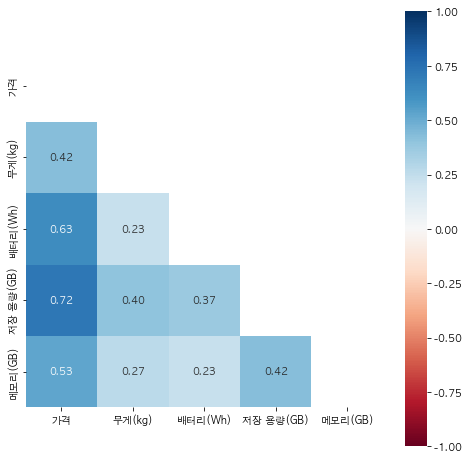

In [46]:
fig, ax = plt.subplots(figsize=(8,8))
corr = notebooks[['가격','무게(kg)','배터리(Wh)','저장 용량(GB)','메모리(GB)']].corr()

mask= np.zeros_like(corr,dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
corr,
mask=mask,
fmt = '.2f', #포멧을 말함 소수점 2자리까지
annot=True, #데이터를 표시할까말까
ax=ax,
cmap='RdBu', #colormap 색깔 종류
vmin=-1,#범위를 정함
vmax=1,
square=True #정사각형으로 만들어줌
)

/Users/jeeyul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CPU 종류', ylabel='가격'>

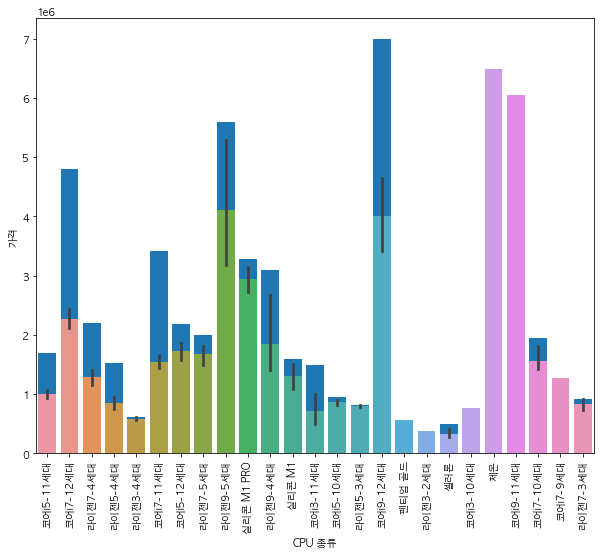

In [47]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(notebooks['CPU 종류'],notebooks['가격'])
plt.xticks(rotation=90)
sns.barplot(notebooks['CPU 종류'],notebooks['가격'])


/Users/jeeyul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, 'Iris Xe'),
  Text(1, 0, 'RTX2050'),
  Text(2, 0, 'MX450'),
  Text(3, 0, 'Radeon Graphics'),
  Text(4, 0, 'RTX3070'),
  Text(5, 0, 'RTX3060'),
  Text(6, 0, 'RTX3080'),
  Text(7, 0, 'Arc A350M'),
  Text(8, 0, 'Radeon 680M'),
  Text(9, 0, 'RTX3050 Ti'),
  Text(10, 0, 'M1 PRO 16 core'),
  Text(11, 0, 'M1 7 core'),
  Text(12, 0, 'RTX3050'),
  Text(13, 0, 'RTX3070 Ti'),
  Text(14, 0, 'UHD Graphics'),
  Text(15, 0, 'RTX3080 Ti'),
  Text(16, 0, 'GTX1650 Ti'),
  Text(17, 0, 'M1 PRO 14 core'),
  Text(18, 0, 'M1 8 core'),
  Text(19, 0, 'GTX1650'),
  Text(20, 0, '쿼드로 T500'),
  Text(21, 0, 'UHD 600'),
  Text(22, 0, 'MX570'),
  Text(23, 0, 'RTX A5000'),
  Text(24, 0, 'RTX A3000'),
  Text(25, 0, '라데온 RX 6600M'),
  Text(26, 0, 'MX350'),
  Text(27, 0, 'RTX2070 SUPER'),
  Text(28, 0, 'GTX1660 Ti')])

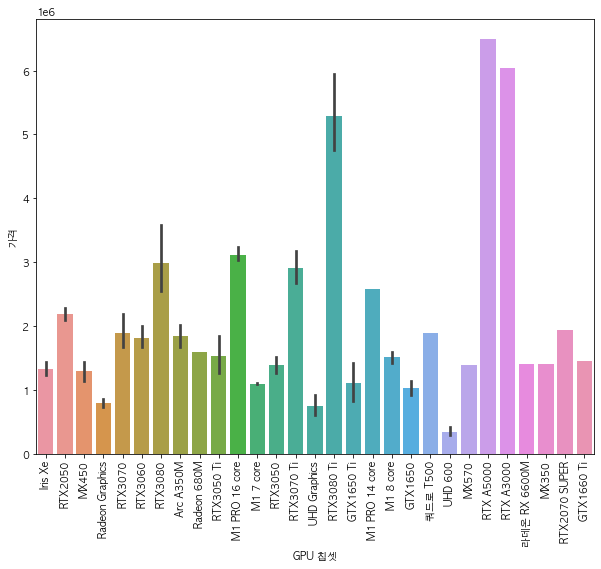

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.bar(notebooks['GPU 칩셋'],notebooks['가격'])
sns.barplot(notebooks['GPU 칩셋'],notebooks['가격'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='count', ylabel='CPU 종류'>

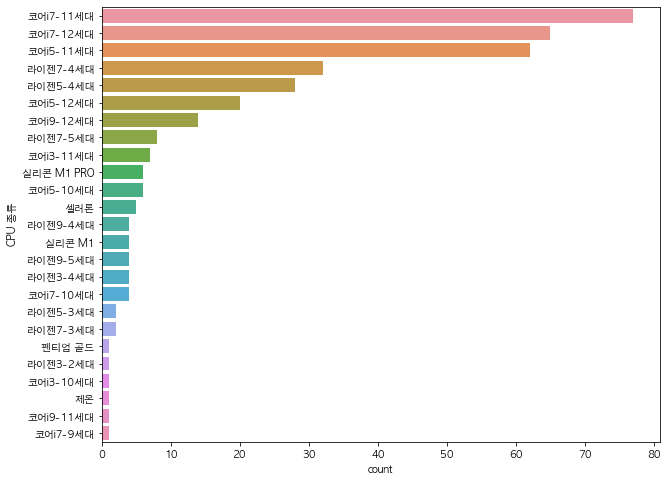

In [49]:
#CPU 종류별 인기 제품 포함 개수
fig,ax = plt.subplots(figsize=(10,8))
sns.countplot(y='CPU 종류',data=notebooks,order= notebooks['CPU 종류'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='제조사'>

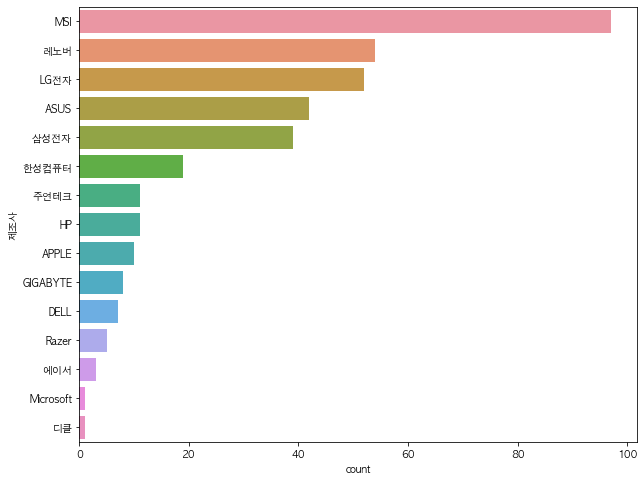

In [50]:
fig,ax = plt.subplots(figsize=(10,8))
sns.countplot(y='제조사',data=notebooks,order= notebooks['제조사'].value_counts().index)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

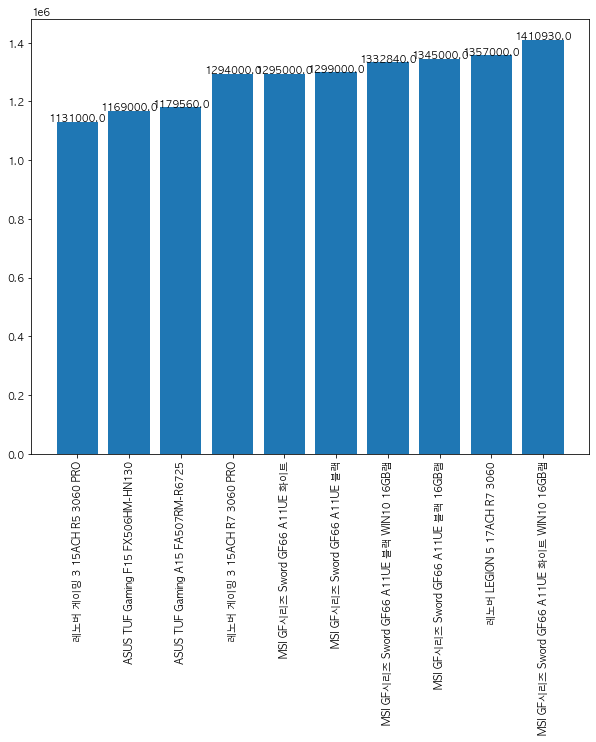

In [1296]:
def add_value_label(y_list):
    for i in range(0,10):
        plt.text(i,y_list[i],y_list[i], ha="center")

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(notebooks.mask(~condition_final).dropna(how='all').sort_values('가격')[:10].index,notebooks.mask(~condition_final).dropna(how='all').sort_values('가격')['가격'][:10])
add_value_label(notebooks.mask(~condition_final).dropna(how='all').sort_values('가격')['가격'][:10])
plt.xticks(rotation=90)


## <center><font size=5> 5. 제품 추천 서비스 만들기 </font></center>
### <center>  소비자 선호 조건에 맞게 제품 정렬하여 보여주기</center>

다나와 쇼핑몰에서는 제조사 / CPU 종류 / 화면 크기 / 메모리 / 저장 용량 / 운영체제 / 무게 를 선택하여 볼 수 있습니다.

하지만, GPU 종류 / 웹캠 유무 / HDMI 포트 유무 / 방향키 종류 / 두께 / 배터리 용량등의 세분화된 스펙은 선택할 수 없습니다.

boolean 개념과 mask 함수를 통해 선호하는 위 스펙을 선택하면 그에 맞는 스펙의 제품이 정렬될 수 있도록 하는 알고리즘을 만들어 보았습니다.

- 우선 category 로 변환할 수 있는 condition_category함수

- 연속형 데이터를 범위 지정으로 bool형태로 변환하는 condition_continuous 함수

위 두 함수를 우선적으로 생성하여 각 데이터에 맞는 함수를 적용해보았습니다.

In [51]:
#GPU 칩셋ct / 웹캠(HD) ct/ HDMIct / 방향키() ct/ USB cont / 두께 cont/ 배터리cont

def condition_category(col_name):
    global notebooks
    print(pd.DataFrame(notebooks[col_name].value_counts().index,index = [i for i in range(1,len(list(notebooks[col_name].value_counts().index))+1)],columns = [col_name]))
    cond = int(input(col_name+'의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 :'))
    print('*'*75)
    

    condition = notebooks[col_name] == notebooks[col_name].value_counts().index[int(cond)-1] if cond >0 else pd.Series(index=notebooks.index, data=[True for i in range(360)])
    return condition


def condition_continuous(col_name):
    global notebooks
    print(pd.DataFrame([max(notebooks[col_name]),min(notebooks[col_name])],index = ['max','min'],columns = [col_name]))
    cond_h = float(input(col_name+'의 원하는 수치기준(~이상)을 입력하세요. 상관이 없다면 -1을 입력하세요 :'))
    cond_l = float(input(col_name+'의 원하는 수치기준(~이하)을 입력하세요. 상관이 없다면 -1을 입력하세요 :'))
    print('*'*75)
    
    if (cond_h == -1.0) & (cond_l == -1.0):
        condition = (min(notebooks[col_name]) <= notebooks[col_name]) & (notebooks[col_name] <= max(notebooks[col_name]))
    elif (cond_h != -1.0) & (cond_l == -1.0):
        condition = (cond_h <= notebooks[col_name]) & (notebooks[col_name] <= max(notebooks[col_name]))
    elif (cond_h == -1.0) & (cond_l != -1.0):
        condition = (min(notebooks[col_name]) <= notebooks[col_name]) & (notebooks[col_name] <= cond_l)
    else:
        condition = (cond_h <= notebooks[col_name]) & (notebooks[col_name] <= cond_l)

    return condition

#notebooks.loc[condition_kg].sort_values('무게(kg)')
#notebooks.mask(~condition_kg).dropna(how='all')

In [116]:
condition_category('GPU 칩셋')

             GPU 칩셋
1           Iris Xe
2           RTX3060
3   Radeon Graphics
4        RTX3070 Ti
5        RTX3050 Ti
6           RTX3050
7             MX450
8           RTX3070
9      UHD Graphics
10          GTX1650
11          RTX3080
12       RTX3080 Ti
13          RTX2050
14        Arc A350M
15          UHD 600
16       GTX1650 Ti
17   M1 PRO 16 core
18        M1 7 core
19   M1 PRO 14 core
20        M1 8 core
21        RTX A3000
22    RTX2070 SUPER
23            MX350
24     라데온 RX 6600M
25      Radeon 680M
26        RTX A5000
27            MX570
28         쿼드로 T500
29       GTX1660 Ti


GPU 칩셋의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 : 20


***************************************************************************


제품명
레노버 아이디어패드 Slim3-15ITL 5D WIN10 16GB램    False
삼성전자 갤럭시북 NT750XDZ-AM58S                 False
LG전자 2022 그램16(12세대) 16ZD90Q-EX76K       False
레노버 요가 Slim7 Carbon 14ACN6 82L0004YKR    False
레노버 V15 G2 82KD000UKR 8GB램               False
                                         ...  
MSI GP시리즈 Vector GP76 12UGS              False
주연테크 슈퍼플라이 J9FT                          False
GIGABYTE AERO 16 XE5 OLED                False
한성컴퓨터 TFG5275                            False
한성컴퓨터 TFX3150U Pro                       False
Name: GPU 칩셋, Length: 360, dtype: bool

In [60]:
condition_final = condition_category('GPU 칩셋')&condition_category('웹캠(HD)')&condition_category('HDMI')&condition_category('방향키(ㅡ형/ㅗ형)')&condition_continuous('USB(개)')&condition_continuous('두께(mm)')&condition_continuous('배터리(Wh)')

notebooks.mask(~condition_final).dropna(how='all').sort_values('가격') #싼 제품부터 정렬되어 나오도록

             GPU 칩셋
1           Iris Xe
2           RTX3060
3   Radeon Graphics
4        RTX3070 Ti
5        RTX3050 Ti
6           RTX3050
7             MX450
8           RTX3070
9      UHD Graphics
10          GTX1650
11          RTX3080
12       RTX3080 Ti
13          RTX2050
14        Arc A350M
15          UHD 600
16       GTX1650 Ti
17   M1 PRO 16 core
18        M1 7 core
19   M1 PRO 14 core
20        M1 8 core
21        RTX A3000
22    RTX2070 SUPER
23            MX350
24     라데온 RX 6600M
25      Radeon 680M
26        RTX A5000
27            MX570
28         쿼드로 T500
29       GTX1660 Ti


GPU 칩셋의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 : 0


***************************************************************************
  웹캠(HD)
1      1
2      0


웹캠(HD)의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 : 1


***************************************************************************
  HDMI
1    1
2    0


HDMI의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 : 0


***************************************************************************
  방향키(ㅡ형/ㅗ형)
1          1
2          0


방향키(ㅡ형/ㅗ형)의 번호를 입력하세요. 상관이 없다면 0을 입력하세요 : 0


***************************************************************************
     USB(개)
max       6
min       0


USB(개)의 원하는 수치기준(~이상)을 입력하세요. 상관이 없다면 -1을 입력하세요 : 2
USB(개)의 원하는 수치기준(~이하)을 입력하세요. 상관이 없다면 -1을 입력하세요 : 6


***************************************************************************
     두께(mm)
max    32.4
min    11.2


두께(mm)의 원하는 수치기준(~이상)을 입력하세요. 상관이 없다면 -1을 입력하세요 : 11.2
두께(mm)의 원하는 수치기준(~이하)을 입력하세요. 상관이 없다면 -1을 입력하세요 : 32.4


***************************************************************************
     배터리(Wh)
max    100.0
min     -1.0


배터리(Wh)의 원하는 수치기준(~이상)을 입력하세요. 상관이 없다면 -1을 입력하세요 : 60
배터리(Wh)의 원하는 수치기준(~이하)을 입력하세요. 상관이 없다면 -1을 입력하세요 : 100


***************************************************************************


,제조사,가격,USB(개),무게(kg),어댑터(W),HDMI,저장 용량(GB),메모리(GB),두께(mm),화면 크기,웹캠(HD),광시야각,배터리(Wh),방향키(ㅡ형/ㅗ형),CPU 종류,운영체제(OS),화면 비율,메모리 타입,저장장치 종류,GPU 칩셋
제품명,,,,,,,,,,,,,,,,,,,,
레노버 씽크북 15 G3 ACL-21A4A036KR 16GB램,레노버,678000.0,4.0,1.70,NaN,1,256.0,16.0,18.90,15.6,1,1,60.00,0,라이젠5-4세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),Radeon Graphics
주연테크 슈퍼플라이 J9FT,주연테크,755100.0,3.0,1.12,65.0,1,512.0,16.0,16.50,14.0,1,1,73.00,1,코어i5-11세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),Iris Xe
ASUS 비보북 프로 14 OLED K3400PA-KM038,ASUS,769000.0,4.0,1.40,65.0,1,256.0,8.0,19.30,14.0,1,0,63.00,1,코어i5-11세대,미포함(프리도스),16:10,DDR4,M.2(NVMe),Iris Xe
LG전자 2022 그램14 14Z95N-G.ARTMK,LG전자,957990.0,4.0,1.00,65.0,1,256.0,8.0,16.80,14.0,1,1,72.00,1,코어i3-11세대,윈도우11홈,16:9,LPDDR4x(온보드),M.2(NVMe),UHD Graphics
한성컴퓨터 올데이롱 TFX5556U,한성컴퓨터,999000.0,4.0,1.40,65.0,1,500.0,16.0,18.00,15.6,1,1,91.24,1,라이젠5-4세대,미포함(프리도스),16:9,DDR4,M.2(NVMe),Radeon Graphics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASUS ROG 제피러스 M16 GU603ZX-K8001W,ASUS,4349000.0,4.0,1.90,240.0,0,2048.0,32.0,19.90,16.0,1,0,90.00,1,코어i9-12세대,윈도우11홈,16:10,DDR5,M.2(NVMe),RTX3080 Ti
DELL XPS 17 9720-WP06KR,DELL,4350000.0,4.0,2.21,130.0,0,1024.0,32.0,19.50,17.0,1,1,97.00,0,코어i9-12세대,윈도우11프로,16:10,DDR5,M.2(NVMe),RTX3060
ASUS ROG 제피러스 듀오 16 GX650RW-LO108W,ASUS,4390000.0,4.0,2.60,280.0,0,2048.0,32.0,20.50,16.0,1,0,90.00,1,라이젠9-5세대,윈도우11홈,16:10,DDR5,M.2(NVMe),RTX3070 Ti
